In [70]:
import pandas as pd

import networkx as nx

import numpy as np

import matplotlib.pyplot as plt

In [71]:
df= pd.read_csv('datasets/dataset.csv')

In [72]:
df=df.sort_values(by=['user_id','date_created'])

In [73]:
df["source"] = df["book"]

In [74]:
df["source"] = df["chapter"] + df["book"]

In [75]:
df["target"]= df["source"].shift(-1)  

In [76]:
df["user_check"]= df["user_id"].shift(-1)

In [77]:
df['keep_drop'] = np.where((df['user_check'] == df['user_id'])
                     , df['user_id'], np.nan)

In [78]:
df=df.dropna(subset=["keep_drop"])

In [79]:
df.to_csv('network.csv')

In [80]:
df["date_created"] = pd.to_datetime(df["date_created"], format=' "%Y-%m-%d %H:%M:%S"')

In [81]:
df["user_check"] = df["user_check"].astype("int64")

In [82]:
df["keep_drop"] = df["keep_drop"].astype("int64")

In [83]:
df

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
1,-2146355313,8,2019-12-14 10:05:50,chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-1ramamurthy,-2146355313,-2146355313
2,-2146355313,8,2019-12-14 10:05:50,chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1thomas,-2146355313,-2146355313
29,-2145886989,10,2019-12-10 13:07:05,chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-4mcnamara,-2145886989,-2145886989
32,-2145886989,10,2019-12-10 13:41:25,chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-1mcnamara,-2145886989,-2145886989
7,-2145886989,1,2019-12-10 19:37:20,chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2145886989,-2145886989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,-2019295583,6,2019-12-07 16:00:11,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4990,-2019295583,10,2019-12-07 16:09:21,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4991,-2019295583,102,2019-12-07 16:14:21,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4992,-2019295583,107,2019-12-07 17:51:22,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583


In [84]:
df = df.reset_index()

In [85]:
df = df.drop(["index"],axis=1)

In [86]:
df.to_csv('network.csv',index=False)

In [87]:
G=nx.from_pandas_edgelist(df, "source", "target", create_using=nx.DiGraph)

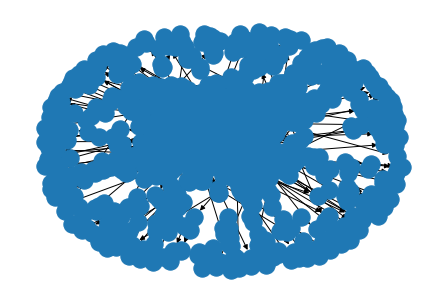

In [88]:
nx.draw(G)

In [89]:
out=nx.out_degree_centrality(G)
nx.set_node_attributes(G, out, 'out-degree')

In [90]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, 'betweenness')

In [91]:
eigen= nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen, 'eigen')

In [92]:
data_list=list(G.nodes(data=True))

In [93]:
data={}

In [94]:
data['book']=[x[0] for x in data_list]

In [95]:
data['out-degree'] = [x[1]['out-degree'] for x in data_list]
data['eigen'] = [x[1]['eigen'] for x in data_list]
data['betweenness'] = [x[1]['betweenness'] for x in data_list]

In [96]:
df1 = pd.DataFrame(data)

In [145]:
df[df["book"]=='clinton3']

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
846,-2117357882,1,2019-12-09 05:48:28,chapter-1,clinton3,598,157,920,1,chapter-1clinton3,chapter-4kopec2,-2117357882,-2117357882
1216,-2099200693,1,2019-10-27 10:18:04,about-this-book,clinton3,598,157,920,1,about-this-bookclinton3,chapter-1clinton3,-2099200693,-2099200693
1217,-2099200693,48,2019-10-28 18:55:32,chapter-1,clinton3,598,157,920,1,chapter-1clinton3,chapter-2clinton3,-2099200693,-2099200693
1218,-2099200693,11,2019-10-30 19:33:38,chapter-2,clinton3,598,157,920,1,chapter-2clinton3,chapter-2clinton3,-2099200693,-2099200693
1219,-2099200693,19,2019-10-30 19:39:38,chapter-2,clinton3,598,157,920,1,chapter-2clinton3,chapter-2clinton3,-2099200693,-2099200693
1220,-2099200693,2,2019-11-05 18:39:12,chapter-2,clinton3,598,157,920,1,chapter-2clinton3,welcomewong,-2099200693,-2099200693
1222,-2099200693,5,2019-11-05 18:41:30,chapter-1,clinton3,598,157,920,1,chapter-1clinton3,chapter-3clinton3,-2099200693,-2099200693
1223,-2099200693,9,2019-11-05 18:43:49,chapter-3,clinton3,598,157,920,1,chapter-3clinton3,chapter-3clinton3,-2099200693,-2099200693
1224,-2099200693,1,2019-11-05 18:45:19,chapter-3,clinton3,598,157,920,1,chapter-3clinton3,chapter-3clinton3,-2099200693,-2099200693
1225,-2099200693,2,2019-11-05 18:45:49,chapter-3,clinton3,598,157,920,1,chapter-3clinton3,chapter-3clinton3,-2099200693,-2099200693


In [127]:
df1["book"]

0                   chapter-8fain3
1              chapter-1ramamurthy
2                  chapter-1thomas
3                chapter-4mcnamara
4                chapter-1mcnamara
                   ...            
1398            chapter-5williams4
1399     table-of-contentswilliams
1400                chapter-7urma2
1401             chapter-3sholmes2
1402               chapter-4devore
Name: book, Length: 1403, dtype: object

In [147]:
row1=[n for n in G[" about-this-bookclinton3"]]

In [148]:
df2= pd.DataFrame(row1)

In [149]:
df3=df2.set_index(0).join(df1.set_index('book'))

In [150]:
df3=df3.sort_values(by=['betweenness'],ascending=False)

In [154]:
df3

,out-degree,eigen,betweenness
0,,,
chapter-2davis4,0.004280,0.121723,0.023314
chapter-1clinton3,0.003566,0.131770,0.014915
chapter-4luksa,0.004280,0.069741,0.009113
about-this-bookcantelon2,0.001427,0.016028,0.002444


The chapters of books that are recommended for the "About this Book" Chapter of Clinton 3 are : Chapter 2 of Davis4,Chapter 1 of Clinton3 and Chapter 4 of Luksa 